In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
tweets = pd.read_csv('/content/Tweets.csv')
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
tweets.shape

(27481, 4)

In [4]:
tweets["sentiment"].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

###Pre-Processing the data

In [5]:
tweets.drop(['selected_text', 'textID'], axis=1, inplace=True)

In [6]:
tweets

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [7]:
print(tweets.isnull().sum())

text         1
sentiment    0
dtype: int64


In [8]:
tweets.dropna(inplace=True)
original_tweets = tweets.copy()

In [9]:
original_tweets.shape

(27480, 2)

###Removing punctuation (.!<>{}’,”(/)-)

In [10]:
original_tweets["text"]

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 27480, dtype: object

In [11]:
# Replacing punctuations with space
original_tweets["text_processed"] = original_tweets["text"].str.replace("[^a-zA-Z0-9]", " ") 

# Re ordering columns
original_tweets = original_tweets[['text','text_processed','sentiment']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [12]:
original_tweets['text_processed']

0                      I d have responded  if I were going
1            Sooo SAD I will miss you here in San Diego   
2                                my boss is bullying me   
3                           what interview  leave me alone
4         Sons of       why couldn t they put them on t...
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I ve wondered about rake to   The client has ...
27478     Yay good for both of you  Enjoy the break   y...
27479                           But it was worth it       
27480       All this flirting going on   The ATG smiles...
Name: text_processed, Length: 27480, dtype: object

#### Replacing short words

In [13]:
original_tweets['text_processed'] = original_tweets['text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [14]:
original_tweets['text_processed']

0                                have responded were going
1                    Sooo SAD will miss you here San Diego
2                                            boss bullying
3                               what interview leave alone
4        Sons why couldn they put them the releases alr...
                               ...                        
27476    wish could come see Denver husband lost his jo...
27477    wondered about rake The client has made clear ...
27478    Yay good for both you Enjoy the break you prob...
27479                                        But was worth
27480      All this flirting going The ATG smiles Yay hugs
Name: text_processed, Length: 27480, dtype: object

In [15]:
# make entire text lowercase
original_tweets['text_processed'] = [review.lower() for review in original_tweets['text_processed']]

In [16]:
original_tweets['text_processed']

0                                have responded were going
1                    sooo sad will miss you here san diego
2                                            boss bullying
3                               what interview leave alone
4        sons why couldn they put them the releases alr...
                               ...                        
27476    wish could come see denver husband lost his jo...
27477    wondered about rake the client has made clear ...
27478    yay good for both you enjoy the break you prob...
27479                                        but was worth
27480      all this flirting going the atg smiles yay hugs
Name: text_processed, Length: 27480, dtype: object

###Remove stopwords

In [17]:
original_tweets['text_processed'].head(10)

0                            have responded were going
1                sooo sad will miss you here san diego
2                                        boss bullying
3                           what interview leave alone
4    sons why couldn they put them the releases alr...
5    http www dothebouncy com smf some shameless pl...
6    2am feedings for the baby are fun when all smi...
7                                           soooo high
8                                             both you
9    journey wow just became cooler hehe that possible
Name: text_processed, dtype: object

In [18]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['http','www','com','twitter', 'sons', 'son', 'sooo', 'one', 'bfn', 'btw', 'dm', 'fyi', 'ic', 'imho', 'irl', 'lmao', 'lol', 'omg', 'rofl', 'rt', 'tweet', 'ty', 'smh', 'atg']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
original_tweets['text_processed'] = [remove_stopwords(r) for r in original_tweets['text_processed']]

In [19]:
original_tweets['text_processed']

0                                          responded going
1                                       sad miss san diego
2                                            boss bullying
3                                    interview leave alone
4                              put releases already bought
                               ...                        
27476    wish could come see denver husband lost job af...
27477    wondered rake client made clear net force devs...
27478    yay good enjoy break probably need hectic week...
27479                                                worth
27480                       flirting going smiles yay hugs
Name: text_processed, Length: 27480, dtype: object

In [20]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

original_tweets['text_processed'] = original_tweets['text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [21]:
original_tweets['text_processed']

0                                               respond go
1                                       sad miss san diego
2                                               boss bully
3                                    interview leave alone
4                                  put release already buy
                               ...                        
27476    wish could come see denver husband lose job af...
27477    wonder rake client make clear net force devs l...
27478    yay good enjoy break probably need hectic week...
27479                                                worth
27480                               flirt go smile yay hug
Name: text_processed, Length: 27480, dtype: object

In [22]:
original_tweets

,text,text_processed,sentiment
0,"I`d have responded, if I were going",respond go,neutral
1,Sooo SAD I will miss you here in San Diego!!!,sad miss san diego,negative
2,my boss is bullying me...,boss bully,negative
3,what interview! leave me alone,interview leave alone,negative
4,"Sons of ****, why couldn`t they put them on t...",put release already buy,negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,wish could come see denver husband lose job af...,negative
27477,I`ve wondered about rake to. The client has ...,wonder rake client make clear net force devs l...,negative
27478,Yay good for both of you. Enjoy the break - y...,yay good enjoy break probably need hectic week...,positive
27479,But it was worth it ****.,worth,positive


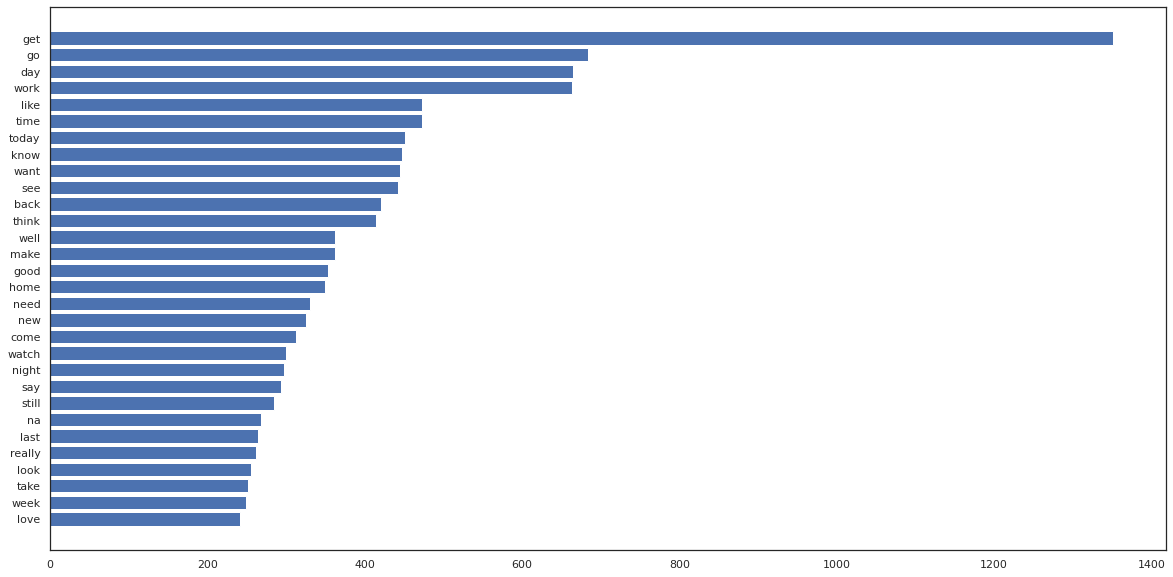

In [23]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_tweets = original_tweets.loc[original_tweets['sentiment'] == 'neutral',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_tweets['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud

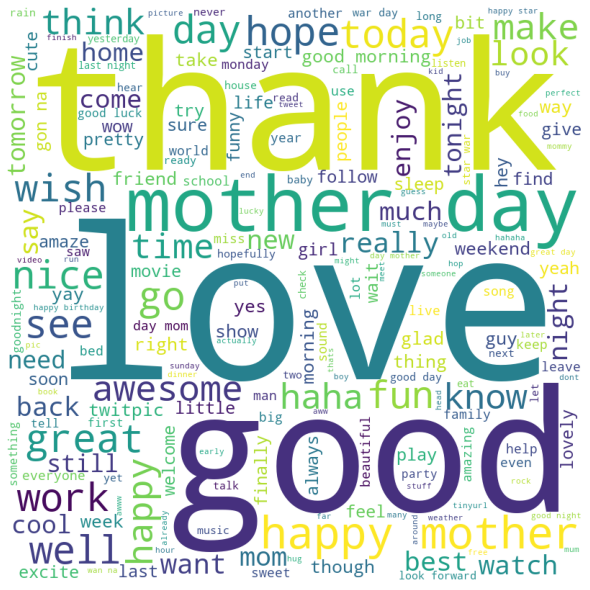

In [24]:
##
## Building a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = original_tweets.loc[original_tweets['sentiment'] == 'positive',:]
all_words = ' '.join([text for text in word_cloud_df['text_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

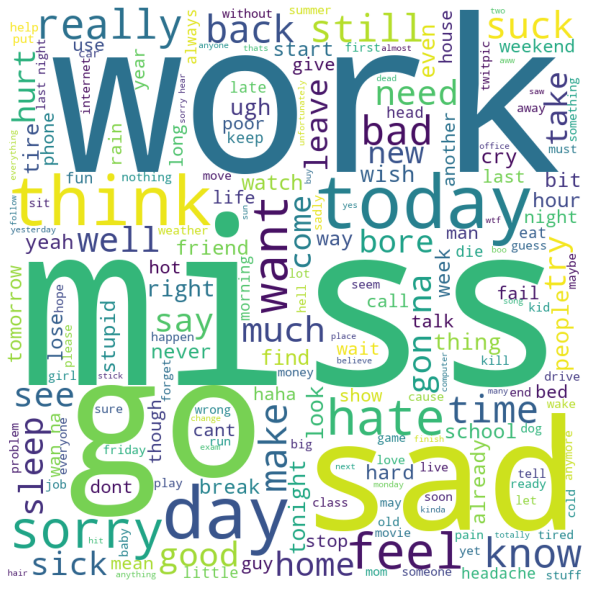

In [25]:
word_cloud_df = original_tweets.loc[original_tweets['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['text_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

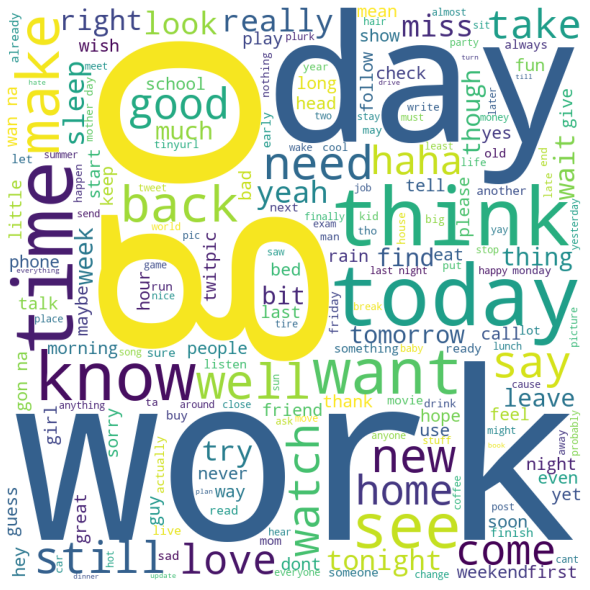

In [26]:
word_cloud_df = original_tweets.loc[original_tweets['sentiment'] == 'neutral',:]
all_words = ' '.join([text for text in word_cloud_df['text_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [27]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

# Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(original_tweets.text_processed).toarray()
le = preprocessing.LabelEncoder()
le.fit(original_tweets["sentiment"])
Y = le.transform(original_tweets["sentiment"])
featureNames = tfidf.get_feature_names()

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
Y

array([1, 0, 0, ..., 2, 2, 1])

In [30]:
X_train.shape, X_test.shape

((21984, 2500), (5496, 2500))

## Building the ML model

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_prob_pred = classifier.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 789  701   88]
 [ 245 1707  306]
 [  51  545 1064]]
The model accuracy is 0.6477438136826783


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_prob_pred, multi_class = 'ovr', average='weighted')

0.8000021799253986

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty='l2', solver = 'saga', max_iter = 150)
LR = LR_model.fit(X_train, Y_train)
pred = LR.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR.predict(X_test), target_names=['neg','neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.73      0.60      0.66      1578
         neu       0.64      0.75      0.69      2258
         pos       0.75      0.70      0.72      1660

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496



In [ ]:
Y_prob_pred_LR = LR.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_LR, multi_class = 'ovr', average='weighted')

0.8374105015415612

##Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Parameter_Trials={'n_estimators':[100,200,300,400,500],
                  'criterion':['gini','entropy']}
RF=RandomForestClassifier()
clf_RF = RandomizedSearchCV(RF, Parameter_Trials, n_iter=2, cv=5, n_jobs=1, verbose=5)
clf_RF.fit(X_train,Y_train)

In [ ]:
clf_RF.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [37]:
print(classification_report(Y_test, model.predict(X_test), target_names=['neg','neu', 'pos']))
confusion_matrix(Y_test, model.predict(X_test))

              precision    recall  f1-score   support

         neg       0.74      0.60      0.67      1588
         neu       0.65      0.73      0.69      2140
         pos       0.75      0.77      0.76      1768

    accuracy                           0.71      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.71      0.71      0.70      5496



array([[ 954,  493,  141],
       [ 258, 1559,  323],
       [  69,  337, 1362]])

In [38]:
Y_prob_pred_RF = model.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_RF, multi_class = 'ovr', average='weighted')

0.8468951285196508

##XGBoost

In [ ]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth = 4)
model_xgb.fit(X_train,Y_train)


XGBClassifier(learning_rate=0.05, max_depth=4, n_estimators=500,
              objective='multi:softprob')

In [ ]:
print(classification_report(Y_test, model_xgb.predict(X_test), target_names=['neg','neu', 'pos']))
confusion_matrix(Y_test, model_xgb.predict(X_test))

              precision    recall  f1-score   support

         neg       0.80      0.47      0.59      1578
         neu       0.59      0.82      0.69      2258
         pos       0.76      0.66      0.71      1660

    accuracy                           0.67      5496
   macro avg       0.72      0.65      0.66      5496
weighted avg       0.70      0.67      0.66      5496



array([[ 741,  743,   94],
       [ 156, 1848,  254],
       [  35,  531, 1094]])

In [ ]:
Y_prob_pred_xgb = model_xgb.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_xgb, multi_class = 'ovr', average='weighted')

0.8228798479968709

##GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, random_state = 0)
GBC.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=0)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(Y_test, GBC.predict(X_test), target_names=['neg','neu', 'pos']))
confusion_matrix(Y_test, GBC.predict(X_test))

              precision    recall  f1-score   support

         neg       0.82      0.37      0.51      1588
         neu       0.53      0.87      0.66      2140
         pos       0.79      0.57      0.66      1768

    accuracy                           0.63      5496
   macro avg       0.71      0.60      0.61      5496
weighted avg       0.70      0.63      0.61      5496



array([[ 586,  916,   86],
       [ 113, 1854,  173],
       [  20,  747, 1001]])

In [35]:
from sklearn.metrics import roc_auc_score
Y_prob_pred_GBC = GBC.predict_proba(X_test)
roc_auc_score(Y_test, Y_prob_pred_GBC, multi_class = 'ovr', average='weighted')

0.7825399815406235

###Summarizing AU-ROC scores for different models

In [41]:
from tabulate import tabulate
table = [['S.No', 'Classification Model', 'AU-ROC Score (one vs rest)'], [1, 'Random Forest', 0.846], [2, 'Logistic Regression', 0.837], [3, 'XGBClassifier', 0.822], [4, 'Naive Bayes', 0.80], [5, 'GradientBoostingClassifier', 0.782]]

In [42]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════════╤══════════════════════════════╕
│   S.No │ Classification Model       │   AU-ROC Score (one vs rest) │
╞════════╪════════════════════════════╪══════════════════════════════╡
│      1 │ Random Forest              │                        0.846 │
├────────┼────────────────────────────┼──────────────────────────────┤
│      2 │ Logistic Regression        │                        0.837 │
├────────┼────────────────────────────┼──────────────────────────────┤
│      3 │ XGBClassifier              │                        0.822 │
├────────┼────────────────────────────┼──────────────────────────────┤
│      4 │ Naive Bayes                │                        0.8   │
├────────┼────────────────────────────┼──────────────────────────────┤
│      5 │ GradientBoostingClassifier │                        0.782 │
╘════════╧════════════════════════════╧══════════════════════════════╛


###**Best Classification Model for predicting Twitter sentiments is Random Forest with AU-ROC Score of 0.846**